In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry
import pyarrow
import openpyxl
import re
import seaborn as sns

In [2]:
# Encoding of the CSV-Files:
! file -i "_data/a557275f-4c30-47fd-a991-b3eb61a3ad80_Series - Metadata.csv"
! file -i "_data/a557275f-4c30-47fd-a991-b3eb61a3ad80_Data.csv"

_data/a557275f-4c30-47fd-a991-b3eb61a3ad80_Series - Metadata.csv: text/csv; charset=us-ascii
_data/a557275f-4c30-47fd-a991-b3eb61a3ad80_Data.csv: text/csv; charset=us-ascii


In [3]:
# Read data and meta data
data_pdf = pd.read_csv('_data/a557275f-4c30-47fd-a991-b3eb61a3ad80_Data.csv', encoding='us-ascii', sep=',', decimal='.')
# meta_data_pdf = pd.read_csv('_data/a557275f-4c30-47fd-a991-b3eb61a3ad80_Series - Metadata.csv', encoding='us-ascii', sep=',', delimiter='.'))

In [4]:
data_pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14635 entries, 0 to 14634
Data columns (total 68 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Country Name   14632 non-null  object
 1   Country Code   14630 non-null  object
 2   Series Name    14630 non-null  object
 3   Series Code    14630 non-null  object
 4   1960 [YR1960]  14630 non-null  object
 5   1961 [YR1961]  14630 non-null  object
 6   1962 [YR1962]  14630 non-null  object
 7   1963 [YR1963]  14630 non-null  object
 8   1964 [YR1964]  14630 non-null  object
 9   1965 [YR1965]  14630 non-null  object
 10  1966 [YR1966]  14630 non-null  object
 11  1967 [YR1967]  14630 non-null  object
 12  1968 [YR1968]  14630 non-null  object
 13  1969 [YR1969]  14630 non-null  object
 14  1970 [YR1970]  14630 non-null  object
 15  1971 [YR1971]  14630 non-null  object
 16  1972 [YR1972]  14630 non-null  object
 17  1973 [YR1973]  14630 non-null  object
 18  1974 [YR1974]  14630 non-n

In [5]:
data_pdf.tail()

,Country Name,Country Code,Series Name,Series Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],...,2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
14630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14631,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14632,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14633,Data from database: World Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14634,Last Updated: 01/28/2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data_pdf.describe()

,Country Name,Country Code,Series Name,Series Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],...,2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
count,14632,14630,14630,14630,14630,14630,14630,14630,14630,14630,...,14630,14630,14630,14630,14630,14630,14630,14630,14630,14630
unique,268,266,55,55,1548,2252,2289,2326,2342,2463,...,10240,9610,9209,9358,9148,9173,9049,8917,7005,4949
top,World,WLD,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
freq,55,55,266,266,12758,12291,12239,12212,12189,11809,...,3699,4356,4784,4635,4855,4836,4990,5117,7103,9570


In [7]:
data_pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14635 entries, 0 to 14634
Data columns (total 68 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Country Name   14632 non-null  object
 1   Country Code   14630 non-null  object
 2   Series Name    14630 non-null  object
 3   Series Code    14630 non-null  object
 4   1960 [YR1960]  14630 non-null  object
 5   1961 [YR1961]  14630 non-null  object
 6   1962 [YR1962]  14630 non-null  object
 7   1963 [YR1963]  14630 non-null  object
 8   1964 [YR1964]  14630 non-null  object
 9   1965 [YR1965]  14630 non-null  object
 10  1966 [YR1966]  14630 non-null  object
 11  1967 [YR1967]  14630 non-null  object
 12  1968 [YR1968]  14630 non-null  object
 13  1969 [YR1969]  14630 non-null  object
 14  1970 [YR1970]  14630 non-null  object
 15  1971 [YR1971]  14630 non-null  object
 16  1972 [YR1972]  14630 non-null  object
 17  1973 [YR1973]  14630 non-null  object
 18  1974 [YR1974]  14630 non-n

# Extract the Countries

Obviously there are also regions reflected in the data and not only countries. Added the pycountry package to extract countries from the dataframe.

In [8]:
# Extract alpha-3 country codes
alpha_3_codes_list = [country.alpha_3 for country in pycountry.countries]

alpha_3_codes_set = set(alpha_3_codes_list)

len(alpha_3_codes_set)

249

In [9]:
data_onlycountries_pdf = data_pdf[data_pdf['Country Code'].isin(alpha_3_codes_list)]

In [10]:
data_onlycountries_pdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11825 entries, 0 to 11934
Data columns (total 68 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Country Name   11825 non-null  object
 1   Country Code   11825 non-null  object
 2   Series Name    11825 non-null  object
 3   Series Code    11825 non-null  object
 4   1960 [YR1960]  11825 non-null  object
 5   1961 [YR1961]  11825 non-null  object
 6   1962 [YR1962]  11825 non-null  object
 7   1963 [YR1963]  11825 non-null  object
 8   1964 [YR1964]  11825 non-null  object
 9   1965 [YR1965]  11825 non-null  object
 10  1966 [YR1966]  11825 non-null  object
 11  1967 [YR1967]  11825 non-null  object
 12  1968 [YR1968]  11825 non-null  object
 13  1969 [YR1969]  11825 non-null  object
 14  1970 [YR1970]  11825 non-null  object
 15  1971 [YR1971]  11825 non-null  object
 16  1972 [YR1972]  11825 non-null  object
 17  1973 [YR1973]  11825 non-null  object
 18  1974 [YR1974]  11825 non-null  

How many countries are in the data?

In [11]:
countries_in_data_list = list(data_onlycountries_pdf['Country Code'])

countries_in_data_set = set(countries_in_data_list)

len(countries_in_data_set)

215

Which countries are missing?

In [12]:
missing_countries = alpha_3_codes_set - countries_in_data_set

print(missing_countries)

{'GUF', 'ATF', 'ALA', 'WLF', 'BVT', 'BLM', 'NIU', 'MTQ', 'MYT', 'TWN', 'GGY', 'UMI', 'PCN', 'MSR', 'IOT', 'HMD', 'AIA', 'SGS', 'VAT', 'JEY', 'TKL', 'REU', 'FLK', 'SPM', 'GLP', 'COK', 'NFK', 'BES', 'ATA', 'ESH', 'CCK', 'SHN', 'SJM', 'CXR'}


In [13]:
# data_onlycountries_pdf = data_onlycountries_pdf.reset_index()

# data_onlycountries_pdf.to_csv('CountriesCleaned.csv')

In [14]:
data_onlycountries_pdf = data_onlycountries_pdf.replace(to_replace='..', value=np.nan)

In [15]:
# Convert values in year columns to numeric values

# Determine columns with years
data_columns_list = list(data_onlycountries_pdf.columns)
data_columns_year_list = [column for column in data_columns_list if re.fullmatch(r"^\d{4} \[YR\d{4}\]$", column)]

data_onlycountries_pdf[data_columns_year_list] = data_onlycountries_pdf[data_columns_year_list].apply(pd.to_numeric, errors='coerce')
# data_onlycountries_pdf['1960 [YR1960]'] = pd.to_numeric(data_onlycountries_pdf['1960 [YR1960]'], errors='coerce')

In [16]:
data_columns_drop_list = data_columns_list[20:-3]

data_columns_selected_list = data_columns_list[0:4] + data_columns_list[24:-3]

data_columns_selected_list

['Country Name',
 'Country Code',
 'Series Name',
 'Series Code',
 '1980 [YR1980]',
 '1981 [YR1981]',
 '1982 [YR1982]',
 '1983 [YR1983]',
 '1984 [YR1984]',
 '1985 [YR1985]',
 '1986 [YR1986]',
 '1987 [YR1987]',
 '1988 [YR1988]',
 '1989 [YR1989]',
 '1990 [YR1990]',
 '1991 [YR1991]',
 '1992 [YR1992]',
 '1993 [YR1993]',
 '1994 [YR1994]',
 '1995 [YR1995]',
 '1996 [YR1996]',
 '1997 [YR1997]',
 '1998 [YR1998]',
 '1999 [YR1999]',
 '2000 [YR2000]',
 '2001 [YR2001]',
 '2002 [YR2002]',
 '2003 [YR2003]',
 '2004 [YR2004]',
 '2005 [YR2005]',
 '2006 [YR2006]',
 '2007 [YR2007]',
 '2008 [YR2008]',
 '2009 [YR2009]',
 '2010 [YR2010]',
 '2011 [YR2011]',
 '2012 [YR2012]',
 '2013 [YR2013]',
 '2014 [YR2014]',
 '2015 [YR2015]',
 '2016 [YR2016]',
 '2017 [YR2017]',
 '2018 [YR2018]',
 '2019 [YR2019]',
 '2020 [YR2020]']

In [17]:
data_onlycountries_pdf = data_onlycountries_pdf[data_columns_selected_list]

In [18]:
data_onlycountries_pdf

,Country Name,Country Code,Series Name,Series Code,1980 [YR1980],1981 [YR1981],1982 [YR1982],1983 [YR1983],1984 [YR1984],1985 [YR1985],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,Afghanistan,AFG,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,2.130000e+01,2.290000e+01,2.450000e+01,2.610000e+01,2.760000e+01,2.880000e+01,3.030000e+01,3.140000e+01,3.260000e+01,3.380000e+01
1,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,4.320000e+01,6.910000e+01,6.800000e+01,8.950000e+01,7.150000e+01,9.770000e+01,9.770000e+01,9.340000e+01,9.770000e+01,9.770000e+01
2,Afghanistan,AFG,"Educational attainment, at least Bachelor's or...",SE.TER.CUAT.BA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.911332e+00,NaN,NaN,5.261417e+00,NaN,NaN,4.323430e+00
3,Afghanistan,AFG,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,8.561908e+00,7.897169e+00,8.805964e+00,9.528878e+00,1.010535e+01,1.181859e+01,1.262082e+01,1.420842e+01,1.483132e+01,1.553361e+01
4,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,6.066947e+02,6.514171e+02,6.370871e+02,6.250549e+02,5.655697e+02,5.220822e+02,5.254698e+02,4.913372e+02,4.966025e+02,5.107871e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11930,Zimbabwe,ZWE,"Manufacturing, value added (current US$)",NV.IND.MANF.CD,1.384407e+09,1.632955e+09,1.638200e+09,1.577868e+09,1.301161e+09,1.022906e+09,...,1.293485e+09,2.403507e+09,2.466380e+09,2.454635e+09,2.373335e+09,2.382829e+09,7.164196e+09,4.671914e+09,3.657623e+09,4.217343e+09
11931,Zimbabwe,ZWE,Military expenditure (% of general government ...,MS.MIL.XPND.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.055478e+00,9.114318e+00,8.930896e+00,9.232506e+00,9.193971e+00,7.363048e+00,5.542350e+00,5.607096e+00,5.504620e+00,6.872332e+00
11932,Zimbabwe,ZWE,Military expenditure (current LCU),MS.MIL.XPND.CN,4.427500e+08,3.897000e+08,4.374500e+08,4.317500e+08,3.606500e+08,3.093000e+08,...,1.984380e+08,3.182720e+08,3.567000e+08,3.681000e+08,3.766770e+08,3.580650e+08,3.405220e+08,4.203640e+08,1.367348e+09,1.186680e+10
11933,Zimbabwe,ZWE,Military expenditure (current USD),MS.MIL.XPND.CD,4.427500e+08,3.897000e+08,4.374500e+08,4.317500e+08,3.606500e+08,3.093000e+08,...,1.984380e+08,3.182720e+08,3.567000e+08,3.681000e+08,3.766770e+08,3.580650e+08,3.405220e+08,4.203640e+08,5.469390e+08,2.421796e+08


In [19]:
data_onlycountries_without_nan_pdf = data_onlycountries_pdf.dropna()

data_onlycountries_without_nan_pdf

,Country Name,Country Code,Series Name,Series Code,1980 [YR1980],1981 [YR1981],1982 [YR1982],1983 [YR1983],1984 [YR1984],1985 [YR1985],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
25,Afghanistan,AFG,Carbon dioxide (CO2) emissions excluding LULUC...,EN.GHG.CO2.PC.CE.AR5,1.523542e-01,1.893097e-01,2.101283e-01,2.749318e-01,2.881713e-01,3.608518e-01,...,3.887425e-01,3.196266e-01,2.624696e-01,2.386428e-01,2.467060e-01,2.169299e-01,2.260112e-01,2.158776e-01,1.914908e-01,1.805550e-01
28,Afghanistan,AFG,"Death rate, crude (per 1,000 people)",SP.DYN.CDRT.IN,2.420900e+01,2.361100e+01,2.562200e+01,2.510700e+01,3.003000e+01,2.966100e+01,...,7.931000e+00,7.711000e+00,7.478000e+00,7.395000e+00,7.331000e+00,7.077000e+00,7.027000e+00,6.981000e+00,6.791000e+00,7.113000e+00
44,Afghanistan,AFG,Land area (sq. km),AG.LND.TOTL.K2,6.522300e+05,6.522300e+05,6.522300e+05,6.522300e+05,6.522300e+05,6.522300e+05,...,6.522300e+05,6.522300e+05,6.522300e+05,6.522300e+05,6.522300e+05,6.522300e+05,6.522300e+05,6.522300e+05,6.522300e+05,6.522300e+05
45,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,3.961800e+01,4.016400e+01,3.776600e+01,3.818700e+01,3.332900e+01,3.355000e+01,...,6.141900e+01,6.192300e+01,6.241700e+01,6.254500e+01,6.265900e+01,6.313600e+01,6.301600e+01,6.308100e+01,6.356500e+01,6.257500e+01
54,Afghanistan,AFG,Mobile cellular subscriptions,IT.CEL.SETS,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.380000e+07,1.530000e+07,1.680000e+07,1.840000e+07,1.970000e+07,2.160000e+07,2.390000e+07,2.200000e+07,2.260000e+07,2.270000e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11925,Zimbabwe,ZWE,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,5.867400e+01,5.932700e+01,5.987500e+01,6.024800e+01,6.105100e+01,6.162400e+01,...,5.334700e+01,5.562600e+01,5.745800e+01,5.884600e+01,5.959100e+01,6.030600e+01,6.070900e+01,6.141400e+01,6.129200e+01,6.112400e+01
11928,Zimbabwe,ZWE,"Manufacturing, value added (annual % growth)",NV.IND.MANF.KD.ZG,1.507666e+01,9.850380e+00,-4.540325e-01,-2.850634e+00,-5.046945e+00,1.149658e+01,...,1.382616e+01,5.325055e+00,-7.605189e-01,-5.110915e+00,1.464246e-01,5.417507e-01,1.332565e+00,1.387913e+00,-1.080115e+01,-1.849517e+01
11929,Zimbabwe,ZWE,"Manufacturing, value added (constant LCU)",NV.IND.MANF.KN,2.397424e+10,2.633580e+10,2.621622e+10,2.546889e+10,2.418349e+10,2.696377e+10,...,3.297280e+10,3.472862e+10,3.446450e+10,3.270305e+10,3.275093e+10,3.292836e+10,3.336715e+10,3.383026e+10,3.017621e+10,2.459507e+10
11930,Zimbabwe,ZWE,"Manufacturing, value added (current US$)",NV.IND.MANF.CD,1.384407e+09,1.632955e+09,1.638200e+09,1.577868e+09,1.301161e+09,1.022906e+09,...,1.293485e+09,2.403507e+09,2.466380e+09,2.454635e+09,2.373335e+09,2.382829e+09,7.164196e+09,4.671914e+09,3.657623e+09,4.217343e+09


In [20]:
temp_pivot = data_onlycountries_without_nan_pdf.pivot(index='Country Name', columns='Series Name', values='Series Name')

temp_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 215 entries, Afghanistan to Zimbabwe
Data columns (total 27 columns):
 #   Column                                                                      Non-Null Count  Dtype 
---  ------                                                                      --------------  ----- 
 0   Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita)  203 non-null    object
 1   Death rate, crude (per 1,000 people)                                        206 non-null    object
 2   Expense (% of GDP)                                                          28 non-null     object
 3   External balance on goods and services (% of GDP)                           109 non-null    object
 4   GDP (current US$)                                                           162 non-null    object
 5   GDP growth (annual %)                                                       149 non-null    object
 6   GDP per capita (constant LCU)                   

In [22]:
# remove nan


filter_columns = ['Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita)',
                  'Death rate, crude (per 1,000 people)',
                  'Life expectancy at birth, total (years)',
                  'Mobile cellular subscriptions',
                  'GDP per capita (current US$)',
                  'GDP (current US$)',
                  'Land area (sq. km)']

temp_pivot_non_nan = temp_pivot.dropna(subset=filter_columns)

country_set = set(temp_pivot_non_nan.index)

country_set

{'Albania',
 'Algeria',
 'Angola',
 'Argentina',
 'Australia',
 'Austria',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Costa Rica',
 "Cote d'Ivoire",
 'Cuba',
 'Cyprus',
 'Denmark',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt, Arab Rep.',
 'El Salvador',
 'Equatorial Guinea',
 'Eswatini',
 'Fiji',
 'Finland',
 'France',
 'French Polynesia',
 'Gabon',
 'Gambia, The',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea-Bissau',
 'Haiti',
 'Honduras',
 'Hong Kong SAR, China',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran, Islamic Rep.',
 'Iraq',
 'Ireland',
 'Italy',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kenya',
 'Kiribati',
 'Kuwait',
 'Lesotho',
 'Madagascar',
 'Malawi',
 'Malaysia',
 'Maldives',
 'Mali',
 'Malta',

In [23]:
# filter features
data_onlycountries_without_nan_pdf = data_onlycountries_without_nan_pdf[data_onlycountries_without_nan_pdf['Series Name'].isin(filter_columns)]

# filter countries
data_onlycountries_without_nan_pdf = data_onlycountries_without_nan_pdf[data_onlycountries_without_nan_pdf['Country Name'].isin(country_set)]

data_onlycountries_without_nan_pdf

,Country Name,Country Code,Series Name,Series Code,1980 [YR1980],1981 [YR1981],1982 [YR1982],1983 [YR1983],1984 [YR1984],1985 [YR1985],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
59,Albania,ALB,GDP per capita (current US$),NY.GDP.PCAP.CD,5.906077e+02,6.632942e+02,6.684545e+02,6.615468e+02,6.394847e+02,6.398659e+02,...,4.437141e+03,4.247631e+03,4.413063e+03,4.578633e+03,3.952804e+03,4.124055e+03,4.531032e+03,5.365489e+03,5.460428e+03,5.370779e+03
65,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,1.578102e+09,1.808177e+09,1.861163e+09,1.881413e+09,1.857338e+09,1.897050e+09,...,1.289076e+10,1.231983e+10,1.277622e+10,1.322815e+10,1.138685e+10,1.186120e+10,1.301973e+10,1.537951e+10,1.558511e+10,1.524146e+10
80,Albania,ALB,Carbon dioxide (CO2) emissions excluding LULUC...,EN.GHG.CO2.PC.CE.AR5,3.021523e+00,2.594444e+00,2.612167e+00,2.739912e+00,2.902877e+00,2.723288e+00,...,1.716993e+00,1.562853e+00,1.647374e+00,1.763799e+00,1.688303e+00,1.575153e+00,1.858911e+00,1.850978e+00,1.735518e+00,1.607133e+00
83,Albania,ALB,"Death rate, crude (per 1,000 people)",SP.DYN.CDRT.IN,6.050000e+00,5.973000e+00,5.899000e+00,5.838000e+00,5.808000e+00,5.794000e+00,...,7.238000e+00,7.573000e+00,7.819000e+00,7.868000e+00,7.947000e+00,8.035000e+00,8.150000e+00,8.308000e+00,8.480000e+00,1.078500e+01
99,Albania,ALB,Land area (sq. km),AG.LND.TOTL.K2,2.740000e+04,2.740000e+04,2.740000e+04,2.740000e+04,2.740000e+04,2.740000e+04,...,2.740000e+04,2.740000e+04,2.740000e+04,2.740000e+04,2.740000e+04,2.740000e+04,2.740000e+04,2.740000e+04,2.740000e+04,2.740000e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11905,Zimbabwe,ZWE,Carbon dioxide (CO2) emissions excluding LULUC...,EN.GHG.CO2.PC.CE.AR5,1.390893e+00,1.252561e+00,1.158290e+00,1.103983e+00,1.118538e+00,1.250746e+00,...,1.165517e+00,9.219934e-01,9.073836e-01,8.867024e-01,8.812757e-01,7.716488e-01,7.146270e-01,8.161255e-01,7.313818e-01,5.842832e-01
11908,Zimbabwe,ZWE,"Death rate, crude (per 1,000 people)",SP.DYN.CDRT.IN,1.106900e+01,1.012200e+01,9.776000e+00,9.442000e+00,8.910000e+00,8.492000e+00,...,1.185700e+01,1.069100e+01,9.787000e+00,9.123000e+00,8.774000e+00,8.441000e+00,8.266000e+00,7.972000e+00,8.043000e+00,8.132000e+00
11924,Zimbabwe,ZWE,Land area (sq. km),AG.LND.TOTL.K2,3.868500e+05,3.868500e+05,3.868500e+05,3.868500e+05,3.868500e+05,3.868500e+05,...,3.868500e+05,3.868500e+05,3.868500e+05,3.868500e+05,3.868500e+05,3.868500e+05,3.868500e+05,3.868500e+05,3.868500e+05,3.868500e+05
11925,Zimbabwe,ZWE,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,5.867400e+01,5.932700e+01,5.987500e+01,6.024800e+01,6.105100e+01,6.162400e+01,...,5.334700e+01,5.562600e+01,5.745800e+01,5.884600e+01,5.959100e+01,6.030600e+01,6.070900e+01,6.141400e+01,6.129200e+01,6.112400e+01


In [25]:
data_onlycountries_without_nan_unpivot_pdf = data_onlycountries_without_nan_pdf.melt(id_vars=['Country Name', 'Country Code', 'Series Name', 'Series Code'], var_name="Year", value_name='Number')

data_onlycountries_without_nan_unpivot_pdf = data_onlycountries_without_nan_unpivot_pdf[data_onlycountries_without_nan_unpivot_pdf['Country Name'].isin(['Germany'])]
# data_onlycountries_without_nan_unpivot_pdf = data_onlycountries_without_nan_unpivot_pdf[data_onlycountries_without_nan_unpivot_pdf['Year].isin([r"2020 [YR2020]"])]

data_onlycountries_without_nan_unpivot_pdf

,Country Name,Country Code,Series Name,Series Code,Year,Number
322,Germany,DEU,GDP per capita (current US$),NY.GDP.PCAP.CD,1980 [YR1980],1.218278e+04
323,Germany,DEU,GDP (current US$),NY.GDP.MKTP.CD,1980 [YR1980],9.537725e+11
324,Germany,DEU,Carbon dioxide (CO2) emissions excluding LULUC...,EN.GHG.CO2.PC.CE.AR5,1980 [YR1980],1.450529e+01
325,Germany,DEU,"Death rate, crude (per 1,000 people)",SP.DYN.CDRT.IN,1980 [YR1980],1.220000e+01
326,Germany,DEU,Land area (sq. km),AG.LND.TOTL.K2,1980 [YR1980],3.491300e+05
...,...,...,...,...,...,...
34484,Germany,DEU,Carbon dioxide (CO2) emissions excluding LULUC...,EN.GHG.CO2.PC.CE.AR5,2020 [YR2020],7.726615e+00
34485,Germany,DEU,"Death rate, crude (per 1,000 people)",SP.DYN.CDRT.IN,2020 [YR2020],1.190000e+01
34486,Germany,DEU,Land area (sq. km),AG.LND.TOTL.K2,2020 [YR2020],3.493900e+05
34487,Germany,DEU,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2020 [YR2020],8.104146e+01


In [26]:
# data_onlycountries_without_nan_unpivot_feature_format_pdf = data_onlycountries_without_nan_unpivot_pdf.drop(columns=['Country Name', 'Country Code', 'Series Code', 'Year'])

data_onlycountries_without_nan_unpivot_feature_format_pdf = data_onlycountries_without_nan_unpivot_pdf.pivot(index=['Country Name', 'Year'], columns='Series Name', values='Number')

data_onlycountries_without_nan_unpivot_feature_format_pdf['Population'] = data_onlycountries_without_nan_unpivot_feature_format_pdf['GDP (current US$)'] / data_onlycountries_without_nan_unpivot_feature_format_pdf['GDP per capita (current US$)']

data_onlycountries_without_nan_unpivot_feature_format_pdf['Mobile per Population'] = data_onlycountries_without_nan_unpivot_feature_format_pdf['Mobile cellular subscriptions'] / data_onlycountries_without_nan_unpivot_feature_format_pdf['Population']

data_onlycountries_without_nan_unpivot_feature_format_pdf['Population Density'] = data_onlycountries_without_nan_unpivot_feature_format_pdf['Population'] / data_onlycountries_without_nan_unpivot_feature_format_pdf['Land area (sq. km)']

data_onlycountries_without_nan_unpivot_feature_format_pdf

Series Name                 Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita)  \
Country Name Year                                                                                        
Germany      1980 [YR1980]                                          14.505289                            
             1981 [YR1981]                                          14.028755                            
             1982 [YR1982]                                          13.455825                            
             1983 [YR1983]                                          13.689671                            
             1984 [YR1984]                                          13.944974                            
             1985 [YR1985]                                          13.983935                            
             1986 [YR1986]                                          13.898455                            
             1987 [YR1987]                                          13.775096                            
             1988 [YR1988]                                          13.641117                            
             1989 [YR1989]                                          13.342881                            
             1990 [YR1990]                                          12.753279                            
             1991 [YR1991]                                          12.398288                            
             1992 [YR1992]                                          11.635423                            
             1993 [YR1993]                                          11.455011                            
             1994 [YR1994]                                          11.242911                            
             1995 [YR1995]                                          11.151350                            
             1996 [YR1996]                                          11.471619                            
             1997 [YR1997]                                          11.066295                            
             1998 [YR1998]                                          11.054013                            
             1999 [YR1999]                                          10.609269                            
             2000 [YR2000]                                          10.603573                            
             2001 [YR2001]                                          10.756759                            
             2002 [YR2002]                                          10.550703                            
             2003 [YR2003]                                          10.641365                            
             2004 [YR2004]                                          10.467327                            
             2005 [YR2005]                                          10.211049                            
             2006 [YR2006]                                          10.389565                            
             2007 [YR2007]                                          10.052620                            
             2008 [YR2008]                                          10.112704                            
             2009 [YR2009]                                           9.383778                            
             2010 [YR2010]                                           9.970763                            
             2011 [YR2011]                                           9.823081                            
             2012 [YR2012]                                           9.952833                            
             2013 [YR2013]                                          10.146596                            
             2014 [YR2014]                                           9.622117                            
             2015 [YR2015]                                           9.614638 

In [27]:
# data_onlycountries_without_nan_unpivot_feature_format_pdf.index

data_onlycountries_without_nan_unpivot_feature_format_pdf.corr()

Series Name,Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita),"Death rate, crude (per 1,000 people)",GDP (current US$),GDP per capita (current US$),Land area (sq. km),"Life expectancy at birth, total (years)",Mobile cellular subscriptions,Population,Mobile per Population,Population Density
Series Name,,,,,,,,,,
Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita),1.000000,0.572811,-0.935494,-0.927706,0.234267,-0.956270,-0.865802,-0.896762,-0.864188,-0.898388
"Death rate, crude (per 1,000 people)",0.572811,1.000000,-0.484330,-0.478326,0.665463,-0.549348,-0.430771,-0.717407,-0.432159,-0.733641
GDP (current US$),-0.935494,-0.484330,1.000000,0.999563,-0.291070,0.959917,0.900082,0.762173,0.900973,0.766342
GDP per capita (current US$),-0.927706,-0.478326,0.999563,1.000000,-0.300584,0.956950,0.897003,0.746061,0.898286,0.750618
Land area (sq. km),0.234267,0.665463,-0.291070,-0.300584,1.000000,-0.310745,-0.351831,-0.183238,-0.360322,-0.213006
"Life expectancy at birth, total (years)",-0.956270,-0.549348,0.959917,0.956950,-0.310745,1.000000,0.939768,0.793740,0.940180,0.798339
Mobile cellular subscriptions,-0.865802,-0.430771,0.900082,0.897003,-0.351831,0.939768,1.000000,0.671609,0.999885,0.678247
Population,-0.896762,-0.717407,0.762173,0.746061,-0.183238,0.793740,0.671609,1.000000,0.666704,0.999539
Mobile per Population,-0.864188,-0.432159,0.900973,0.898286,-0.360322,0.940180,0.999885,0.666704,1.000000,0.673631


In [28]:
# drop some more columns

data_onlycountries_without_nan_unpivot_feature_format_pdf = data_onlycountries_without_nan_unpivot_feature_format_pdf.drop(columns=['GDP (current US$)', 'Land area (sq. km)', 'Mobile cellular subscriptions', 'Population'])

array([[<Axes: title={'center': 'Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita)'}>,
        <Axes: title={'center': 'Death rate, crude (per 1,000 people)'}>],
       [<Axes: title={'center': 'GDP per capita (current US$)'}>,
        <Axes: title={'center': 'Life expectancy at birth, total (years)'}>],
       [<Axes: title={'center': 'Mobile per Population'}>,
        <Axes: title={'center': 'Population Density'}>]], dtype=object)

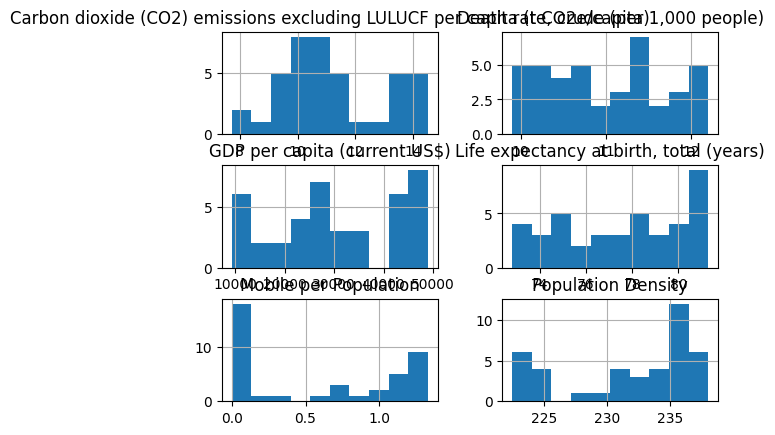

In [29]:
data_onlycountries_without_nan_unpivot_feature_format_pdf.hist()

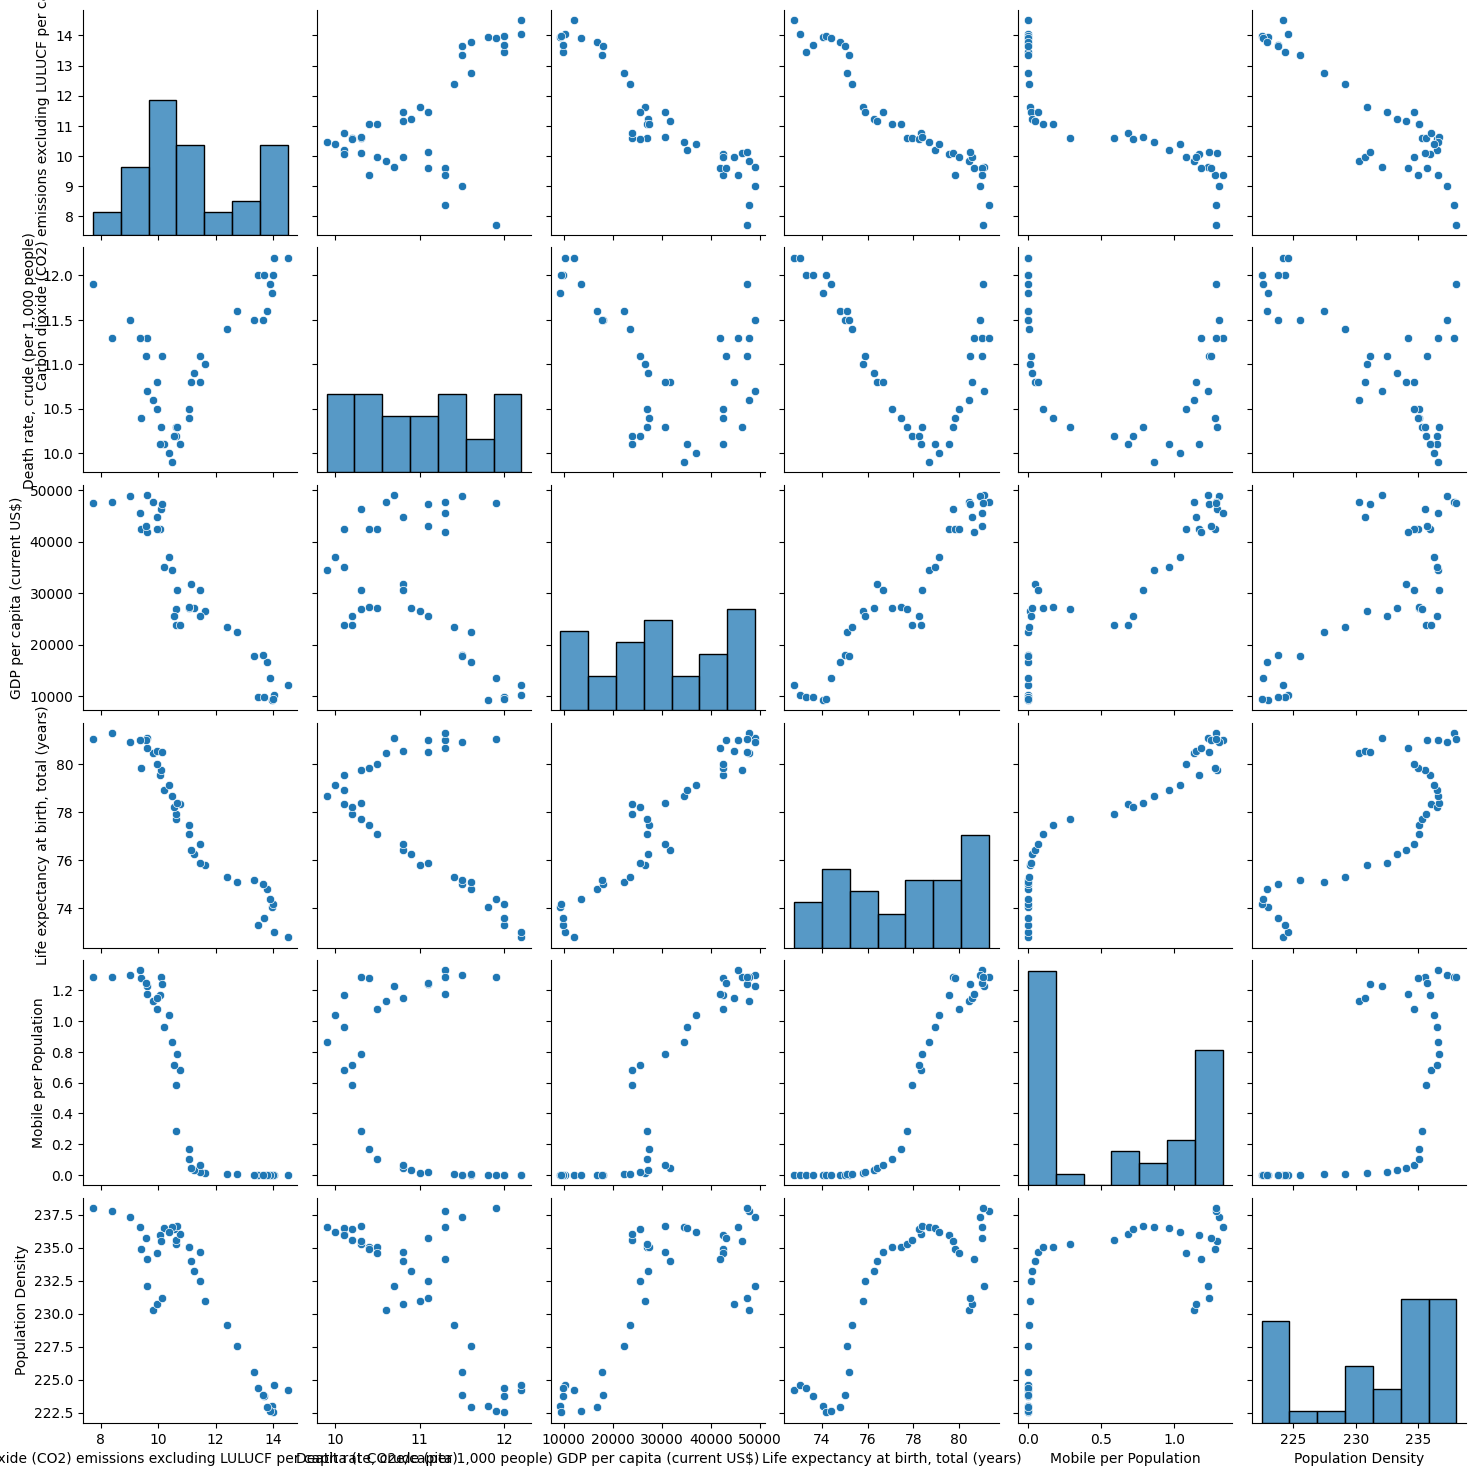

In [30]:
sns.pairplot(data_onlycountries_without_nan_unpivot_feature_format_pdf)